In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

bowler_data=pd.read_csv(r'C:\Users\acer\Desktop\sample_datasets\Bowler_data.csv')
ground_data=pd.read_csv(r'C:\Users\acer\Desktop\sample_datasets\Ground_Averages.csv')
odi_result_data=pd.read_csv(r'C:\Users\acer\Desktop\sample_datasets\ODI_Match_Results.csv')
odi_scores_data=pd.read_csv(r'C:\Users\acer\Desktop\sample_datasets\ODI_Match_Totals.csv')
players_data=pd.read_csv(r'C:\Users\acer\Desktop\sample_datasets\WC_players.csv')


In [3]:
#gives better understanding than odi_result_data
odi_scores_data.head()

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [4]:
odi_scores_data=odi_scores_data.rename(columns={'Unnamed: 0':'scores_id'})
odi_scores_data.head()

,scores_id,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [5]:
odi_scores_data.Ground

0          Kolkata
1          Kolkata
2            Delhi
3            Delhi
4        Melbourne
           ...    
1291    Nottingham
1292    Nottingham
1293       Belfast
1294         Leeds
1295         Leeds
Name: Ground, Length: 1296, dtype: object

In [6]:
WC_venue_pitches = ["The Oval, London","Trent Bridge, Nottingham","Sophia Gardens, Cardiff","County Ground, Bristol","Rose Bowl, Southampton","County Ground, Taunton","Old Trafford, Manchester","Edgbaston, Birmingham","Headingley, Leeds","Lord's, London","Riverside Ground, Chester-le-Street"]
wc_grounds = []
odi_grounds = odi_scores_data.Ground
for i in odi_grounds:
    for j in WC_venue_pitches:
        if i in j :
            
            wc_grounds.append((i,j))


In [7]:
wc_grounds

[("Lord's", "Lord's, London"),
 ("Lord's", "Lord's, London"),
 ('Southampton', 'Rose Bowl, Southampton'),
 ('Southampton', 'Rose Bowl, Southampton'),
 ('Nottingham', 'Trent Bridge, Nottingham'),
 ('Nottingham', 'Trent Bridge, Nottingham'),
 ('Cardiff', 'Sophia Gardens, Cardiff'),
 ('Cardiff', 'Sophia Gardens, Cardiff'),
 ('The Oval', 'The Oval, London'),
 ('The Oval', 'The Oval, London'),
 ('Birmingham', 'Edgbaston, Birmingham'),
 ('Birmingham', 'Edgbaston, Birmingham'),
 ('Cardiff', 'Sophia Gardens, Cardiff'),
 ('Cardiff', 'Sophia Gardens, Cardiff'),
 ('Birmingham', 'Edgbaston, Birmingham'),
 ('Birmingham', 'Edgbaston, Birmingham'),
 ('The Oval', 'The Oval, London'),
 ('The Oval', 'The Oval, London'),
 ('Birmingham', 'Edgbaston, Birmingham'),
 ('Birmingham', 'Edgbaston, Birmingham'),
 ('The Oval', 'The Oval, London'),
 ('The Oval', 'The Oval, London'),
 ('Cardiff', 'Sophia Gardens, Cardiff'),
 ('Cardiff', 'Sophia Gardens, Cardiff'),
 ('Birmingham', 'Edgbaston, Birmingham'),
 ('Birming

In [8]:
Ground_names = dict(set(wc_grounds))
def Full_Ground_names(value):
    return Ground_names[value]
Ground_names

{'Bristol': 'County Ground, Bristol',
 'Manchester': 'Old Trafford, Manchester',
 'Chester-le-Street': 'Riverside Ground, Chester-le-Street',
 'Cardiff': 'Sophia Gardens, Cardiff',
 'The Oval': 'The Oval, London',
 'Birmingham': 'Edgbaston, Birmingham',
 'Nottingham': 'Trent Bridge, Nottingham',
 'Southampton': 'Rose Bowl, Southampton',
 'Leeds': 'Headingley, Leeds',
 "Lord's": "Lord's, London"}

In [9]:
#Let's gather the data of all ODI's in these WC Venues
WC_Grounds_History = odi_scores_data[odi_scores_data.Ground.isin(Ground_names.keys())]


WC_Grounds_History['Ground']= WC_Grounds_History.Ground.apply(Full_Ground_names)
WC_Grounds_History.head()

,scores_id,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
74,557,231/5,46.5,4.93,228.0,2,won,v England,"Lord's, London",31 May 2013,ODI # 3360,Newzealad,5
75,844,227/9,50.0,4.54,NaN,1,lost,v New Zealand,"Lord's, London",31 May 2013,ODI # 3360,England,1
76,558,359/3,50.0,7.18,NaN,1,won,v England,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,Newzealad,5
77,845,273,44.1,6.18,360.0,2,lost,v New Zealand,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,England,1
78,559,253,46.3,5.44,288.0,2,lost,v England,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,Newzealad,5


In [10]:
Team_matches=WC_Grounds_History.Country.value_counts().reset_index()
Team_matches.head()

,index,Country
0,England,68
1,Australia,20
2,Pakistan,18
3,SriLanka,17
4,India,17


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'England'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Pakistan'),
  Text(3, 0, 'SriLanka'),
  Text(4, 0, 'India'),
  Text(5, 0, 'Newzealad'),
  Text(6, 0, 'SouthAfrica'),
  Text(7, 0, 'WestIndies'),
  Text(8, 0, 'Bangladesh')])

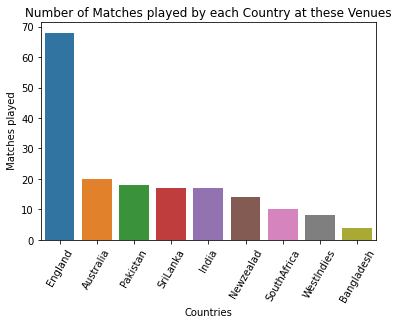

In [11]:
sns.barplot(x="index",y="Country",data=Team_matches).set_title('Number of Matches played by each Country at these Venues')
plt.xlabel('Countries')
plt.ylabel(' Matches played')
plt.xticks(rotation=60)

In [12]:
#this shows england had the upper hand at these Venues,they are more used to the pitches condition .

In [13]:

WC_Grounds_History.sample(6)
WC_Grounds_History.Result.value_counts()


won     79
lost    77
n/r     14
tied     4
-        2
Name: Result, dtype: int64

In [14]:
WC_Grounds_History = WC_Grounds_History[~WC_Grounds_History.Result.isin(["-"])]
WC_Grounds_History.Result.value_counts()

won     79
lost    77
n/r     14
tied     4
Name: Result, dtype: int64

In [15]:
winnings = WC_Grounds_History[["Country","Result"]]
winnings["count"] = 1
Ground_Results_Per_Team = winnings.groupby(["Country","Result"]).sum()
Ground_Results_Per_Team 
#here Result column  is the first level of hierarchy so we will apply level=0 for calculating result percentage of each country

count
Country     Result       
Australia   lost       11
            n/r         4
            won         5
Bangladesh  lost        2
            n/r         1
            won         1
England     lost       21
            n/r         4
            tied        1
            won        41
India       lost        5
            won        12
Newzealad   lost        7
            n/r         2
            won         5
Pakistan    lost       11
            n/r         1
            won         5
SouthAfrica lost        6
            tied        1
            won         3
SriLanka    lost        9
            n/r         1
            tied        1
            won         6
WestIndies  lost        5
            n/r         1
            tied        1
            won         1

In [16]:
Ground_Results_Per_Team = Ground_Results_Per_Team.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Ground_Results_Per_Team.columns = ["Country","Result","Count"]
Ground_Results_Per_Team.head()

,Country,Result,Count
0,Australia,lost,55.0
1,Australia,n/r,20.0
2,Australia,won,25.0
3,Bangladesh,lost,50.0
4,Bangladesh,n/r,25.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Bangladesh'),
  Text(2, 0, 'England'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Newzealad'),
  Text(5, 0, 'Pakistan'),
  Text(6, 0, 'SouthAfrica'),
  Text(7, 0, 'SriLanka'),
  Text(8, 0, 'WestIndies')])

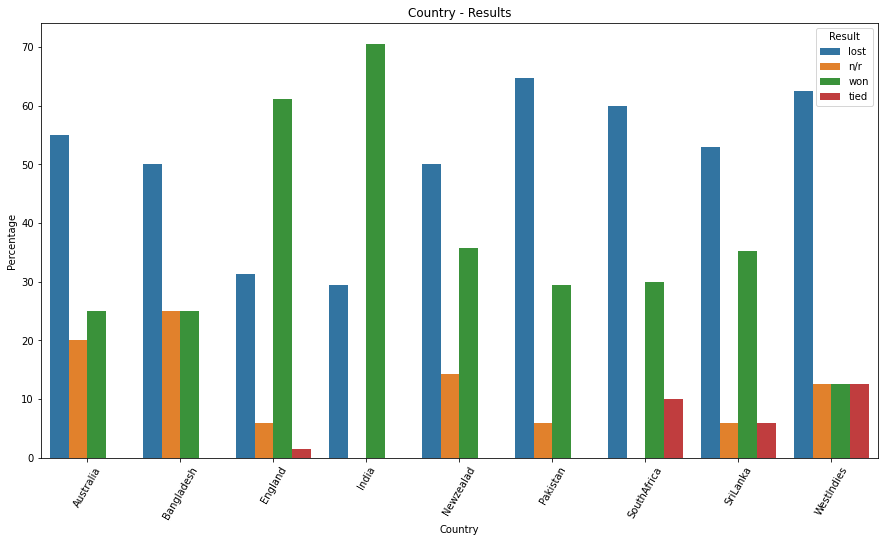

In [17]:
#now creating a barplot representing the results of each country
plt.figure(figsize=(15,8))
sns.barplot(x = "Country", y = "Count", hue = "Result", data = Ground_Results_Per_Team)
plt.ylabel("Percentage")
plt.title("Country - Results")
plt.xticks(rotation = 60)

In [18]:
#as we can see here India and England have  the highest winning percentage 
#where Westindies and South Africa having the highest losing percentage
#lets see when India and England face off each other
India_vs_England = WC_Grounds_History[WC_Grounds_History.Country == "England"]\
[WC_Grounds_History.Opposition.str.contains("India")]
India_vs_England = India_vs_England.Result.value_counts().reset_index()
India_vs_England

,index,Result
0,lost,5
1,won,3


Text(0.5, 0, 'England')

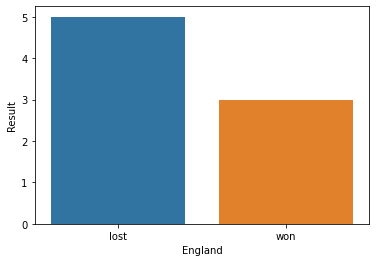

In [19]:
sns.barplot(x="index",y="Result",data=India_vs_England)
plt.xlabel('England')

Text(0, 0.5, 'Winning Percentage')

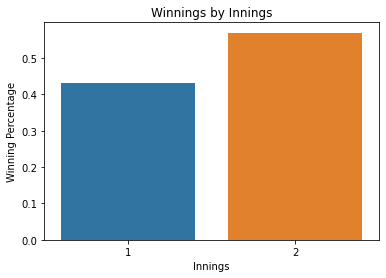

In [20]:
Inning_Wins = WC_Grounds_History[WC_Grounds_History.Result == "won"].Inns.value_counts(normalize = True).reset_index()
Inning_Wins
normalize = True
sns.barplot(x = "index", y = "Inns", data = Inning_Wins).set_title("Winnings by Innings")
plt.xlabel("Innings")
plt.ylabel("Winning Percentage")

In [21]:
#this shows  that the team who bowls first have the  approx. 57% chances of winning
WC_Grounds_History.sample(5)
                         

,scores_id,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
98,424,165,39.4,4.15,NaN,1,lost,v India,"Edgbaston, Birmingham",15 Jun 2013,ODI # 3372,Pakistan,7
893,937,308/2,47.2,6.50,306.0,2,won,v Bangladesh,"The Oval, London",1 Jun 2017,ODI # 3875,England,1
1092,1190,205,34.4,5.91,NaN,1,lost,v England,"Old Trafford, Manchester",24 Jun 2018,ODI # 4013,Australia,2
298,868,73/0,12.1,6.00,68.0,2,won,v Sri Lanka,"Old Trafford, Manchester",28 May 2014,ODI # 3494,England,1
341,872,227,50.0,4.54,NaN,1,lost,v India,"Trent Bridge, Nottingham",30 Aug 2014,ODI # 3520,England,1


In [22]:
pitch_innings=WC_Grounds_History[WC_Grounds_History.Result=="won"][["Inns","Ground"]]
pitch_innings["count"]=1
pitch_innings = pitch_innings.groupby(["Ground","Inns"]).sum()
pitch_innings=pitch_innings.groupby(level=0).apply(lambda x: 100*x/float(x.sum())).reset_index()
pitch_innings.head()

,Ground,Inns,count
0,"County Ground, Bristol",1,33.333333
1,"County Ground, Bristol",2,66.666667
2,"Edgbaston, Birmingham",1,41.666667
3,"Edgbaston, Birmingham",2,58.333333
4,"Headingley, Leeds",1,40.000000


Text(0, 0.5, 'win precentage')

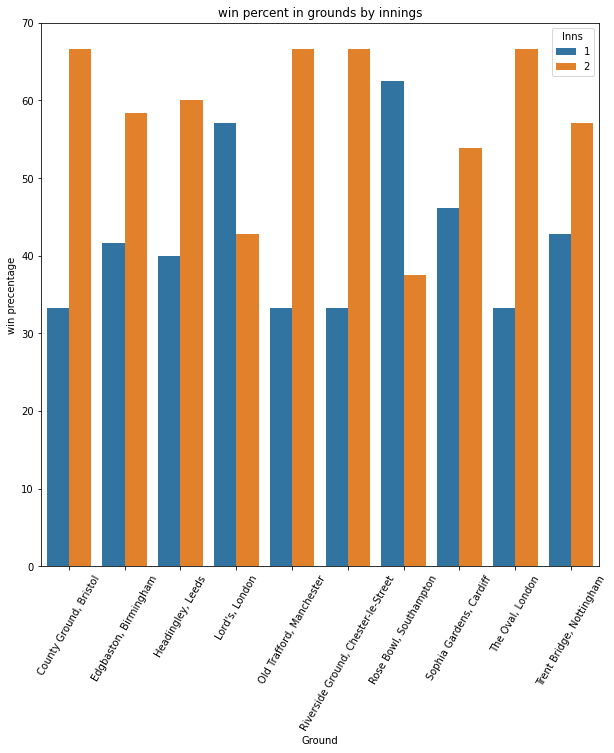

In [23]:
plt.figure(figsize=(10,10))
sns.barplot(x="Ground",y="count",hue="Inns",data=pitch_innings).set_title('win percent in grounds by innings')
plt.xticks(rotation=60)
plt.ylabel('win precentage')


Text(0.5, 1.0, 'Scores VS Pitches')

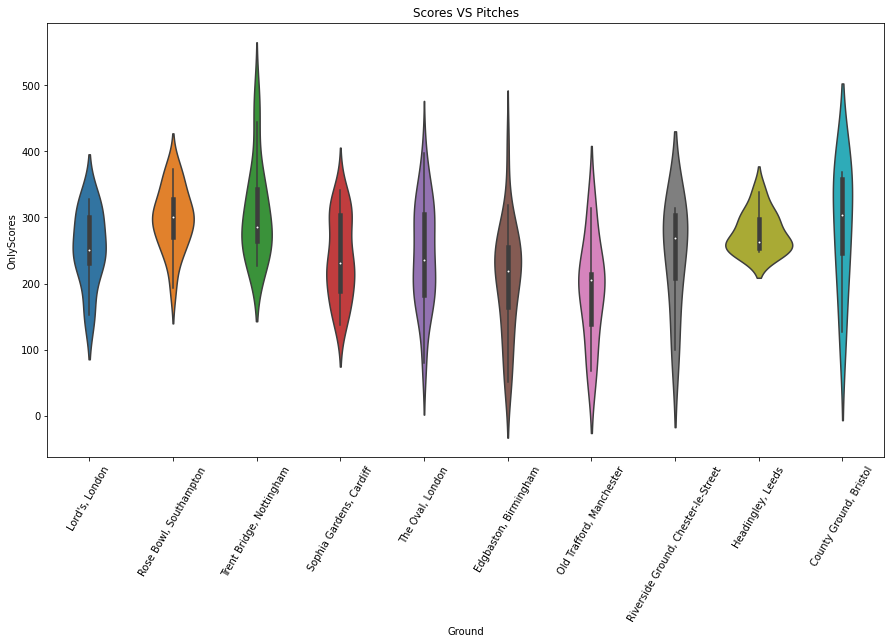

In [24]:
WC_Grounds_History=WC_Grounds_History[~WC_Grounds_History.Score.str.contains('D')]
#WC_Grounds_History.head()
splited_scores=[int(i[0]) for i in WC_Grounds_History.Score.str.split('/')]
WC_Grounds_History['OnlyScores'] =splited_scores
Stadium_scores=WC_Grounds_History[["OnlyScores","Ground"]]
Stadium_scores=Stadium_scores[Stadium_scores.OnlyScores>50]
#Stadium_scores.head()
plt.figure(figsize=(15,8))
plt.xticks(rotation =60)
sns.violinplot(x="Ground",y="OnlyScores",  data=Stadium_scores).set_title('Scores VS Pitches')
#from the violinplot, it is clear that 


In [25]:
def no_of_wickets(value):
    if "/" not in value:
        return 10
    elif "D" in value:
        return 0
    else:
        return int(value.split("/")[-1])
WC_Grounds_History["Total_Wickets"] = WC_Grounds_History.Score.apply(no_of_wickets)
WC_Grounds_History.head()

,scores_id,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,OnlyScores,Total_Wickets
74,557,231/5,46.5,4.93,228.0,2,won,v England,"Lord's, London",31 May 2013,ODI # 3360,Newzealad,5,231,5
75,844,227/9,50.0,4.54,NaN,1,lost,v New Zealand,"Lord's, London",31 May 2013,ODI # 3360,England,1,227,9
76,558,359/3,50.0,7.18,NaN,1,won,v England,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,Newzealad,5,359,3
77,845,273,44.1,6.18,360.0,2,lost,v New Zealand,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,England,1,273,10
78,559,253,46.3,5.44,288.0,2,lost,v England,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,Newzealad,5,253,10


In [26]:
Stadium_Wickets = WC_Grounds_History[["Total_Wickets","Ground"]]
Stadium_Wickets = Stadium_Wickets.groupby("Ground").mean().reset_index()
Stadium_Wickets.head()

,Ground,Total_Wickets
0,"County Ground, Bristol",6.428571
1,"Edgbaston, Birmingham",6.310345
2,"Headingley, Leeds",7.100000
3,"Lord's, London",7.692308
4,"Old Trafford, Manchester",7.333333


<AxesSubplot:xlabel='Ground', ylabel='Total_Wickets'>

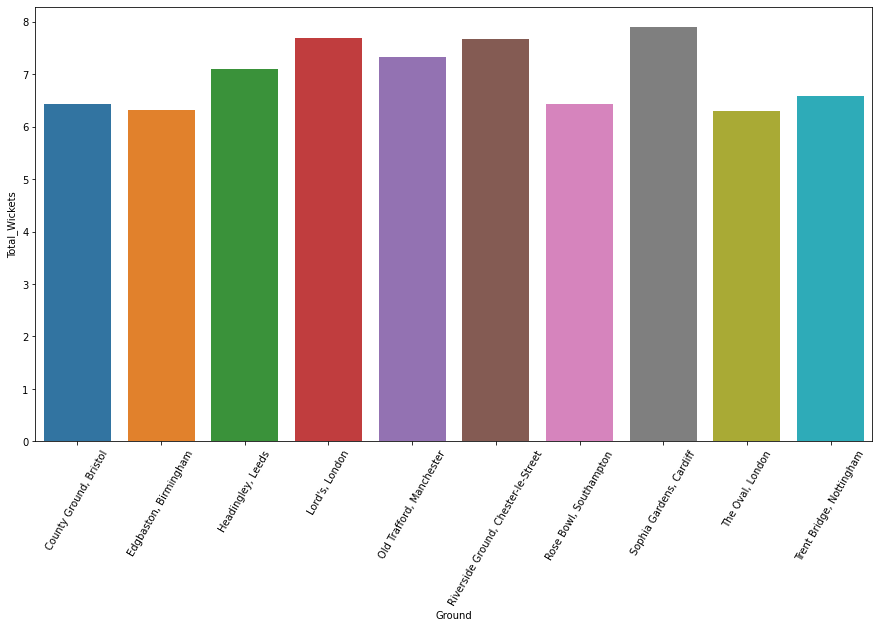

In [27]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=60)
sns.barplot(x="Ground",y="Total_Wickets",data=Stadium_Wickets)
#as we can see here avearge wickets per ground is 6-7

# Let's analyze the batsmen_data

In [28]:
batsmen_data=pd.read_csv(r'C:\Users\acer\Desktop\sample_datasets\Batsman_data.csv')

batsmen_data.drop(columns=batsmen_data.columns[0],inplace=True)
#batsmen_data.head()
batsmen_data=batsmen_data[~batsmen_data.Bat1.isin(["DNB","TDNB"])]
batsmen_data=batsmen_data[batsmen_data.Player_ID.isin(players_data.ID)]
stadiums=[i for i in Ground_names.keys()]

batsmen_data_in_england=batsmen_data[batsmen_data.Ground.isin(stadiums)]
#batsmen_data_in_england=batsmen_data_in_england.Ground.apply(Full_Ground_names)
batsmen_data_in_england["Ground"]=batsmen_data_in_england.Ground.apply(Full_Ground_names)
batsmen_data_in_england

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
111,7,7,13,53.84,1,0,v England,"Rose Bowl, Southampton",16 Jun 2012,ODI # 3276,Andre Russell,276298
193,5*,5,6,83.33,1,0,v Pakistan,"The Oval, London",7 Jun 2013,ODI # 3364,Kemar Roach,230553
194,0*,0,8,0.00,0,0,v India,"The Oval, London",11 Jun 2013,ODI # 3368,Kemar Roach,230553
246,1,1,8,12.50,0,0,v England,"Old Trafford, Manchester",19 Sep 2017,ODI # 3911,Ashley Nurse,315594
248,1,1,5,20.00,0,0,v England,"County Ground, Bristol",24 Sep 2017,ODI # 3915,Ashley Nurse,315594
...,...,...,...,...,...,...,...,...,...,...,...,...
10280,19,19,24,79.16,2,0,v England,"The Oval, London",13 Jun 2018,ODI # 4009,Aaron Finch,5334
10281,0,0,4,0.00,0,0,v England,"Sophia Gardens, Cardiff",16 Jun 2018,ODI # 4010,Aaron Finch,5334
10282,20,20,19,105.26,0,2,v England,"Trent Bridge, Nottingham",19 Jun 2018,ODI # 4011,Aaron Finch,5334
10283,100,100,106,94.33,6,3,v England,"Riverside Ground, Chester-le-Street",21 Jun 2018,ODI # 4012,Aaron Finch,5334


In [29]:
#for finding averages of batsmen
def times_out(value):
    if "*" in value:
        return 0
    else:
        return 1

batsmen_data_in_england["Times_out"]=batsmen_data_in_england.Bat1.apply(times_out)  
change_type=["Runs","BF","4s","6s"]
for i in change_type:
    batsmen_data_in_england[i]=batsmen_data_in_england[i].astype("int")

batsmen_data_in_england.sample(10)

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,Times_out
1080,0,0,4,0.00,0,0,v England,"Trent Bridge, Nottingham",6 Jul 2011,ODI # 3169,Lasith Malinga,49758,1
8052,14,14,34,41.17,1,0,v India,"Headingley, Leeds",5 Sep 2014,ODI # 3525,Eoin Morgan,24598,1
10203,26,26,32,81.25,6,0,v England,"Rose Bowl, Southampton",16 Sep 2013,ODI # 3416,Aaron Finch,5334,1
2234,5*,5,12,41.66,0,0,v England,"The Oval, London",29 Aug 2008,ODI # 2757,Dale Steyn,47492,0
248,1,1,5,20.00,0,0,v England,"County Ground, Bristol",24 Sep 2017,ODI # 3915,Ashley Nurse,315594,1
7295,106*,106,97,109.27,13,0,v New Zealand,"Trent Bridge, Nottingham",17 Jun 2015,ODI # 3657,Joe Root,303669,0
847,40,40,29,137.93,1,5,v England,"Rose Bowl, Southampton",29 Sep 2017,ODI # 3918,Chris Gayle,51880,1
7573,7,7,10,70.00,1,0,v Pakistan,"Rose Bowl, Southampton",24 Aug 2016,ODI # 3770,Alex Hales,249866,1
5523,0*,0,0,-,0,0,v Sri Lanka,"The Oval, London",8 Jun 2017,ODI # 3882,Ravindra Jadeja,234675,0
4213,8,8,30,26.66,0,0,v England,"County Ground, Bristol",21 Jun 2008,ODI # 2710,Ross Taylor,38699,1


In [30]:
#batsmen_data_in_england.groupby(["Ground","Batsman"]).sum()

In [31]:
batsmen_data_in_england=batsmen_data_in_england.groupby(["Ground","Batsman"]).sum().reset_index()
batsmen_data_in_england["average"]=batsmen_data_in_england["Runs"]/batsmen_data_in_england["Times_out"]

batsmen_data_in_england.sample(25)


,Ground,Batsman,Runs,BF,4s,6s,Player_ID,Times_out,average
124,"Headingley, Leeds",JP Duminy,33,51,1,0,89864,2,16.500000
497,"Trent Bridge, Nottingham",Tamim Iqbal,28,22,4,0,56194,1,28.000000
256,"Riverside Ground, Chester-le-Street",Mohammad Hafeez,30,42,4,0,41434,1,30.000000
142,"Headingley, Leeds",Shikhar Dhawan,75,93,11,1,56470,2,37.500000
222,"Old Trafford, Manchester",Mashrafe Mortaza,0,3,0,0,56007,1,0.000000
484,"Trent Bridge, Nottingham",Mashrafe Mortaza,5,13,1,0,112014,2,2.500000
400,"The Oval, London",Jason Holder,77,62,4,4,391485,1,77.000000
495,"Trent Bridge, Nottingham",Shikhar Dhawan,56,50,9,0,56470,2,28.000000
493,"Trent Bridge, Nottingham",Shakib Al Hasan,20,36,2,0,56143,1,20.000000
499,"Trent Bridge, Nottingham",Tom Curran,31,30,5,0,550235,1,31.000000


In [32]:
batsmen_scores=batsmen_data_in_england.groupby(['Batsman']).sum().reset_index()
batsmen_scores["Average"]=batsmen_scores["Runs"]/batsmen_scores["Times_out"]

#batsmen_scores=batsmen_scores.drop(['average'],axis=1,inplace=True)
batsmen_scores.sort_values(by="Average",ascending=False).sample(5)

,Batsman,Runs,BF,4s,6s,Player_ID,Times_out,average,Average
25,Evin Lewis,200,152,18,9,1295703,2,inf,100.000000
94,Soumya Sarkar,34,60,4,1,1746708,4,18.500000,8.500000
43,Jhye Richardson,21,34,0,0,2322669,2,inf,10.500000
70,Moeen Ali,621,534,51,26,222925,19,474.666667,32.684211
27,Faheem Ashraf,31,30,2,1,2043351,3,31.000000,10.333333


In [33]:
batsmen_scores.drop(columns="average",inplace=True)


In [34]:
best_batsmen_avg=batsmen_scores[(batsmen_scores.Times_out>0) &(batsmen_scores.Average>40)].sort_values(by="Average",ascending=False)
best_batsmen_avg

,Batsman,Runs,BF,4s,6s,Player_ID,Times_out,Average
35,Imam-ul-Haq,234,263,24,1,2273104,2,117.000000
25,Evin Lewis,200,152,18,9,1295703,2,100.000000
39,Jason Holder,152,121,10,7,1174455,2,76.000000
81,Ravindra Jadeja,281,258,29,5,2346750,4,70.250000
86,Sarfaraz Ahmed,465,502,38,1,2277600,7,66.428571
46,Jonny Bairstow,1439,1295,166,23,9220423,22,65.409091
92,Shikhar Dhawan,976,966,118,13,479995,15,65.066667
52,Kane Williamson,815,849,84,7,3890684,13,62.692308
82,Rohit Sharma,687,829,72,13,511530,12,57.250000
33,Hashim Amla,851,941,94,5,746402,15,56.733333


In [35]:
Player_Name_Id=batsmen_data[["Player_ID","Batsman"]].drop_duplicates()

In [36]:
Player_id=list(best_batsmen_avg.merge(Player_Name_Id,how="left",on="Batsman")["Player_ID_y"].astype("int"))

In [37]:
best_batsmen_avg["Player_ID"]=Player_id
best_batsmen_avg

,Batsman,Runs,BF,4s,6s,Player_ID,Times_out,Average
35,Imam-ul-Haq,234,263,24,1,568276,2,117.000000
25,Evin Lewis,200,152,18,9,431901,2,100.000000
39,Jason Holder,152,121,10,7,391485,2,76.000000
81,Ravindra Jadeja,281,258,29,5,234675,4,70.250000
86,Sarfaraz Ahmed,465,502,38,1,227760,7,66.428571
46,Jonny Bairstow,1439,1295,166,23,297433,22,65.409091
92,Shikhar Dhawan,976,966,118,13,28235,15,65.066667
52,Kane Williamson,815,849,84,7,277906,13,62.692308
82,Rohit Sharma,687,829,72,13,34102,12,57.250000
33,Hashim Amla,851,941,94,5,43906,15,56.733333


In [38]:
players_data.sample(6)

,Player,ID,Country
80,Trent Boult,277912,NewZealand
101,Faheem Ashraf,681117,Pakistan
35,Mushfiqur Rahim (wk),56029,Bangladesh
32,Shakib Al Hasan (vc),56143,Bangladesh
1,Rashid Khan (vc),793463,Afghanistan
85,Colin Munro,232359,NewZealand


In [39]:
players_data.columns=["Player","Player_ID","Country"]
#players_data.sample(6)
Country_Player=list(best_batsmen_avg.merge(players_data,how = "left",on="Player_ID")["Country"])
best_batsmen_avg["Country"]=Country_Player
best_batsmen_avg.head()


,Batsman,Runs,BF,4s,6s,Player_ID,Times_out,Average,Country
35,Imam-ul-Haq,234,263,24,1,568276,2,117.000000,Pakistan
25,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies
39,Jason Holder,152,121,10,7,391485,2,76.000000,WestIndies
81,Ravindra Jadeja,281,258,29,5,234675,4,70.250000,India
86,Sarfaraz Ahmed,465,502,38,1,227760,7,66.428571,Pakistan


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Pakistan'),
  Text(1, 0, 'WestIndies'),
  Text(2, 0, 'India'),
  Text(3, 0, 'England'),
  Text(4, 0, 'NewZealand'),
  Text(5, 0, 'SouthAfrica'),
  Text(6, 0, 'Bangladesh'),
  Text(7, 0, 'SriLanka'),
  Text(8, 0, 'Australia')])

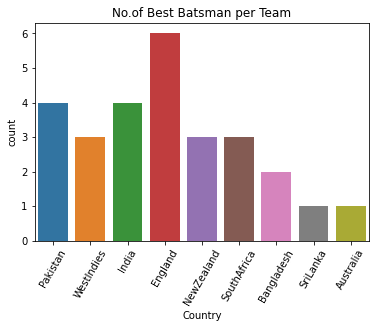

In [40]:
sns.countplot(best_batsmen_avg["Country"]).set_title("No.of Best Batsman per Team")
plt.xticks(rotation = 60)

In [41]:
best_batsmen_avg["Strike_Rate"]=best_batsmen_avg["Runs"]/best_batsmen_avg["BF"]*100
best_batsmen_avg.sort_values(["Strike_Rate"],ascending=False).head(10)

,Batsman,Runs,BF,4s,6s,Player_ID,Times_out,Average,Country,Strike_Rate
25,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies,131.578947
39,Jason Holder,152,121,10,7,391485,2,76.000000,WestIndies,125.619835
47,Jos Buttler,1654,1358,147,47,308967,32,51.687500,England,121.796760
28,Fakhar Zaman,452,394,50,11,512191,8,56.500000,Pakistan,114.720812
34,Imad Wasim,224,200,22,5,227758,5,44.800000,Pakistan,112.000000
46,Jonny Bairstow,1439,1295,166,23,297433,22,65.409091,England,111.119691
40,Jason Roy,1686,1539,187,34,298438,38,44.368421,England,109.551657
81,Ravindra Jadeja,281,258,29,5,234675,4,70.250000,India,108.914729
92,Shikhar Dhawan,976,966,118,13,28235,15,65.066667,India,101.035197
91,Shaun Marsh,372,374,28,11,6683,8,46.500000,Australia,99.465241


# Now moving onto to bowler's data and analyze it :)

In [82]:
 for i in Ground_names.keys():
        print(i,end= '  ')
        
        
stadiums       

Bristol  Manchester  Chester-le-Street  Cardiff  The Oval  Birmingham  Nottingham  Southampton  Leeds  Lord's  

['Bristol',
 'Manchester',
 'Chester-le-Street',
 'Cardiff',
 'The Oval',
 'Birmingham',
 'Nottingham',
 'Southampton',
 'Leeds',
 "Lord's"]

In [83]:
bowler_data.head(15)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID,Total_balls
6,7,7.0,0,52.0,2.0,7.42,26.00,21.0,v England,The Oval,28 Jun 2011,ODI # 3165,Suranga Lakmal,49619,42.0
7,8,7.5,0,43.0,3.0,5.48,14.33,15.6,v England,Leeds,1 Jul 2011,ODI # 3167,Suranga Lakmal,49619,47.0
8,9,10.0,0,62.0,2.0,6.20,31.00,30.0,v England,Lord's,3 Jul 2011,ODI # 3168,Suranga Lakmal,49619,60.0
9,10,2.0,0,12.0,0.0,6.00,-,-,v England,Nottingham,6 Jul 2011,ODI # 3169,Suranga Lakmal,49619,12.0
26,27,6.0,0,34.0,0.0,5.66,-,-,v England,The Oval,22 May 2014,ODI # 3492,Suranga Lakmal,49619,36.0
43,44,10.0,0,65.0,2.0,6.50,32.50,30.0,v England,Nottingham,21 Jun 2016,ODI # 3751,Suranga Lakmal,49619,60.0
44,45,5.0,0,21.0,0.0,4.20,-,-,v England,Birmingham,24 Jun 2016,ODI # 3753,Suranga Lakmal,49619,30.0
45,46,2.0,0,8.0,1.0,4.00,8.00,12.0,v England,Bristol,26 Jun 2016,ODI # 3755,Suranga Lakmal,49619,12.0
46,47,7.0,0,48.0,1.0,6.85,48.00,42.0,v England,The Oval,29 Jun 2016,ODI # 3757,Suranga Lakmal,49619,42.0
47,48,10.0,0,65.0,1.0,6.50,65.00,60.0,v England,Cardiff,2 Jul 2016,ODI # 3758,Suranga Lakmal,49619,60.0


In [84]:
bowler_data=bowler_data[bowler_data.Ground.isin(stadiums)]
bowler_data=bowler_data[~bowler_data.Overs.str.contains('-')]
bowler_data.head(10)

AttributeError: Can only use .str accessor with string values!

Econ : Economy of Bowler means, how many runs does the Bowler concede in one Over?
Ave : Average for a Bowler means, how many runs conceded by Bowler per wicket.
SR : Strike Rate refers to no.of balls bowled for gaining the wicket.
Mdns : Maiden Over refers that the Bowler didn't concede any run.

In [85]:
#now for calculating no. of balls ,we will create a function def total_balls
def total_balls(value):
    if '.' in value:
        over= value.split('.')
        return int(over[0])*6 + int(over[1])
    else:
        return int(value)*6
    
bowler_data["Total_balls"]=bowler_data.Overs.apply(total_balls) 
bowler_data.head(15)

TypeError: argument of type 'float' is not iterable

In [86]:
samp=["Overs","Runs","Total_balls","Wkts"]
for i in samp:
    bowler_data[i]=bowler_data[i].astype("float")
#bowler_data.head(8) 
#bowler_data.Ground=bowler_data.Ground.apply(Full_Ground_names)
#bowler_data.head(8)
bowler_data_england=bowler_data.groupby("Bowler").sum().reset_index()
bowler_data_england

,Bowler,Unnamed: 0,Overs,Runs,Wkts,Player_ID,Total_balls
0,Aaron Finch,10263,1.0,7.0,0.0,5334,6.0
1,Adam Zampa,18941,12.2,65.0,2.0,759008,74.0
2,Adil Rashid,325399,397.0,2219.0,72.0,10757868,2382.0
3,Andile Phehlukwayo,7137,24.0,158.0,3.0,1620948,144.0
4,Andre Russell,112,6.0,43.0,0.0,276298,36.0
...,...,...,...,...,...,...,...
76,Tim Southee,80341,126.5,704.0,25.0,3717824,761.0
77,Tom Curran,22856,30.0,211.0,7.0,1650705,180.0
78,Trent Boult,24593,44.0,240.0,9.0,1389560,264.0
79,Virat Kohli,33837,18.0,120.0,1.0,1269010,108.0


In [87]:
bowler_data_england['Bowling_Econ.']=bowler_data_england["Runs"]/bowler_data_england["Overs"]
bowler_data_england['Bowling_S.R']=bowler_data_england["Total_balls"]/bowler_data_england["Wkts"]
bowler_data_england['Bowling_Avg']=bowler_data_england["Runs"]/bowler_data_england['Wkts']
bowler_data_england


,Bowler,Unnamed: 0,Overs,Runs,Wkts,Player_ID,Total_balls,Bowling_Econ.,Bowling_S.R,Bowling_Avg
0,Aaron Finch,10263,1.0,7.0,0.0,5334,6.0,7.000000,inf,inf
1,Adam Zampa,18941,12.2,65.0,2.0,759008,74.0,5.327869,37.000000,32.500000
2,Adil Rashid,325399,397.0,2219.0,72.0,10757868,2382.0,5.589421,33.083333,30.819444
3,Andile Phehlukwayo,7137,24.0,158.0,3.0,1620948,144.0,6.583333,48.000000,52.666667
4,Andre Russell,112,6.0,43.0,0.0,276298,36.0,7.166667,inf,inf
...,...,...,...,...,...,...,...,...,...,...
76,Tim Southee,80341,126.5,704.0,25.0,3717824,761.0,5.565217,30.440000,28.160000
77,Tom Curran,22856,30.0,211.0,7.0,1650705,180.0,7.033333,25.714286,30.142857
78,Trent Boult,24593,44.0,240.0,9.0,1389560,264.0,5.454545,29.333333,26.666667
79,Virat Kohli,33837,18.0,120.0,1.0,1269010,108.0,6.666667,108.000000,120.000000


In [88]:
bowler_data_england[bowler_data_england.Bowler==('Jasprit Bumrah')]

,Bowler,Unnamed: 0,Overs,Runs,Wkts,Player_ID,Total_balls,Bowling_Econ.,Bowling_S.R,Bowling_Avg
30,Jasprit Bumrah,27965,42.0,210.0,4.0,3126915,252.0,5.0,63.0,52.5


In [89]:
bowler_data_england=bowler_data_england[(bowler_data_england.Overs>9)&(bowler_data_england.Wkts>0)]
bowler_data_england

,Bowler,Unnamed: 0,Overs,Runs,Wkts,Player_ID,Total_balls,Bowling_Econ.,Bowling_S.R,Bowling_Avg
1,Adam Zampa,18941,12.2,65.0,2.0,759008,74.0,5.327869,37.000000,32.500000
2,Adil Rashid,325399,397.0,2219.0,72.0,10757868,2382.0,5.589421,33.083333,30.819444
3,Andile Phehlukwayo,7137,24.0,158.0,3.0,1620948,144.0,6.583333,48.000000,52.666667
5,Angelo Mathews,23963,51.0,232.0,8.0,646932,306.0,4.549020,38.250000,29.000000
6,Ashley Nurse,997,27.5,202.0,1.0,1262376,167.0,7.345455,167.000000,202.000000
...,...,...,...,...,...,...,...,...,...,...
76,Tim Southee,80341,126.5,704.0,25.0,3717824,761.0,5.565217,30.440000,28.160000
77,Tom Curran,22856,30.0,211.0,7.0,1650705,180.0,7.033333,25.714286,30.142857
78,Trent Boult,24593,44.0,240.0,9.0,1389560,264.0,5.454545,29.333333,26.666667
79,Virat Kohli,33837,18.0,120.0,1.0,1269010,108.0,6.666667,108.000000,120.000000


In [107]:
bowler_data_england.head(10)

,Bowler,Unnamed: 0,Overs,Runs,Wkts,Player_ID_x,Total_balls,Bowling_Econ.,Bowling_S.R,Bowling_Avg,Player_ID_y
0,Adam Zampa,18941,12.2,65.0,2.0,759008,74.0,5.327869,37.000000,32.500000,379504
1,Adil Rashid,325399,397.0,2219.0,72.0,10757868,2382.0,5.589421,33.083333,30.819444,244497
2,Andile Phehlukwayo,7137,24.0,158.0,3.0,1620948,144.0,6.583333,48.000000,52.666667,540316
3,Angelo Mathews,23963,51.0,232.0,8.0,646932,306.0,4.549020,38.250000,29.000000,49764
4,Ashley Nurse,997,27.5,202.0,1.0,1262376,167.0,7.345455,167.000000,202.000000,315594
5,Ben Stokes,234648,198.1,1224.0,30.0,10268214,1189.0,6.178698,39.633333,40.800000,311158
6,Bhuvneshwar Kumar,85022,115.3,517.0,18.0,4890240,693.0,4.483955,38.500000,28.722222,326016
7,Chris Gayle,10719,93.4,446.0,15.0,830080,566.0,4.775161,37.733333,29.733333,51880
8,Chris Morris,19038,63.0,343.0,8.0,3959568,378.0,5.444444,47.250000,42.875000,439952
9,Chris Woakes,188431,208.9,1185.0,33.0,6675345,1257.0,5.672571,38.090909,35.909091,247235


In [108]:
Player_WC_ID = bowler_data[["Player_ID","Bowler"]].drop_duplicates()
Player_WC_ID

,Player_ID,Bowler
6,49619,Suranga Lakmal
111,276298,Andre Russell
193,230553,Kemar Roach
246,315594,Ashley Nurse
589,51880,Chris Gayle
...,...,...
9857,325026,Glenn Maxwell
10029,272279,Nathan Lyon
10072,261354,Nathan Coulter-Nile
10128,489889,Pat Cummins


In [109]:
bowler_data_england=bowler_data_england.merge(Player_WC_ID,how = "left",on = "Bowler")
bowler_data_england

,Bowler,Unnamed: 0,Overs,Runs,Wkts,Player_ID_x,Total_balls,Bowling_Econ.,Bowling_S.R,Bowling_Avg,Player_ID_y,Player_ID
0,Adam Zampa,18941,12.2,65.0,2.0,759008,74.0,5.327869,37.000000,32.500000,379504,379504
1,Adil Rashid,325399,397.0,2219.0,72.0,10757868,2382.0,5.589421,33.083333,30.819444,244497,244497
2,Andile Phehlukwayo,7137,24.0,158.0,3.0,1620948,144.0,6.583333,48.000000,52.666667,540316,540316
3,Angelo Mathews,23963,51.0,232.0,8.0,646932,306.0,4.549020,38.250000,29.000000,49764,49764
4,Ashley Nurse,997,27.5,202.0,1.0,1262376,167.0,7.345455,167.000000,202.000000,315594,315594
...,...,...,...,...,...,...,...,...,...,...,...,...
59,Tim Southee,80341,126.5,704.0,25.0,3717824,761.0,5.565217,30.440000,28.160000,232364,232364
60,Tom Curran,22856,30.0,211.0,7.0,1650705,180.0,7.033333,25.714286,30.142857,550235,550235
61,Trent Boult,24593,44.0,240.0,9.0,1389560,264.0,5.454545,29.333333,26.666667,277912,277912
62,Virat Kohli,33837,18.0,120.0,1.0,1269010,108.0,6.666667,108.000000,120.000000,253802,253802


In [112]:

#players_data.sample(10)
country=list(bowler_data_england.merge(players_data,how = "left",on = "Player_ID")["Country"])

bowler_data_england["Country"]=country


,Bowler,Unnamed: 0,Overs,Runs,Wkts,Player_ID_x,Total_balls,Bowling_Econ.,Bowling_S.R,Bowling_Avg,Player_ID_y,Player_ID,Country
0,Adam Zampa,18941,12.2,65.0,2.0,759008,74.0,5.327869,37.000000,32.500000,379504,379504,Australia
1,Adil Rashid,325399,397.0,2219.0,72.0,10757868,2382.0,5.589421,33.083333,30.819444,244497,244497,England
2,Andile Phehlukwayo,7137,24.0,158.0,3.0,1620948,144.0,6.583333,48.000000,52.666667,540316,540316,SouthAfrica
3,Angelo Mathews,23963,51.0,232.0,8.0,646932,306.0,4.549020,38.250000,29.000000,49764,49764,SriLanka
4,Ashley Nurse,997,27.5,202.0,1.0,1262376,167.0,7.345455,167.000000,202.000000,315594,315594,WestIndies
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Tim Southee,80341,126.5,704.0,25.0,3717824,761.0,5.565217,30.440000,28.160000,232364,232364,NewZealand
60,Tom Curran,22856,30.0,211.0,7.0,1650705,180.0,7.033333,25.714286,30.142857,550235,550235,England
61,Trent Boult,24593,44.0,240.0,9.0,1389560,264.0,5.454545,29.333333,26.666667,277912,277912,NewZealand
62,Virat Kohli,33837,18.0,120.0,1.0,1269010,108.0,6.666667,108.000000,120.000000,253802,253802,India


In [113]:
bowler_data_england=bowler_data_england.drop(['Player_ID_x','Player_ID'],axis=1)
bowler_data_england

,Bowler,Unnamed: 0,Overs,Runs,Wkts,Total_balls,Bowling_Econ.,Bowling_S.R,Bowling_Avg,Player_ID_y,Country
0,Adam Zampa,18941,12.2,65.0,2.0,74.0,5.327869,37.000000,32.500000,379504,Australia
1,Adil Rashid,325399,397.0,2219.0,72.0,2382.0,5.589421,33.083333,30.819444,244497,England
2,Andile Phehlukwayo,7137,24.0,158.0,3.0,144.0,6.583333,48.000000,52.666667,540316,SouthAfrica
3,Angelo Mathews,23963,51.0,232.0,8.0,306.0,4.549020,38.250000,29.000000,49764,SriLanka
4,Ashley Nurse,997,27.5,202.0,1.0,167.0,7.345455,167.000000,202.000000,315594,WestIndies
...,...,...,...,...,...,...,...,...,...,...,...
59,Tim Southee,80341,126.5,704.0,25.0,761.0,5.565217,30.440000,28.160000,232364,NewZealand
60,Tom Curran,22856,30.0,211.0,7.0,180.0,7.033333,25.714286,30.142857,550235,England
61,Trent Boult,24593,44.0,240.0,9.0,264.0,5.454545,29.333333,26.666667,277912,NewZealand
62,Virat Kohli,33837,18.0,120.0,1.0,108.0,6.666667,108.000000,120.000000,253802,India


In [114]:
bowler_data_england=bowler_data_england.rename(columns={'Player_ID_y':'Player_ID'})
bowler_data_england

,Bowler,Unnamed: 0,Overs,Runs,Wkts,Total_balls,Bowling_Econ.,Bowling_S.R,Bowling_Avg,Player_ID,Country
0,Adam Zampa,18941,12.2,65.0,2.0,74.0,5.327869,37.000000,32.500000,379504,Australia
1,Adil Rashid,325399,397.0,2219.0,72.0,2382.0,5.589421,33.083333,30.819444,244497,England
2,Andile Phehlukwayo,7137,24.0,158.0,3.0,144.0,6.583333,48.000000,52.666667,540316,SouthAfrica
3,Angelo Mathews,23963,51.0,232.0,8.0,306.0,4.549020,38.250000,29.000000,49764,SriLanka
4,Ashley Nurse,997,27.5,202.0,1.0,167.0,7.345455,167.000000,202.000000,315594,WestIndies
...,...,...,...,...,...,...,...,...,...,...,...
59,Tim Southee,80341,126.5,704.0,25.0,761.0,5.565217,30.440000,28.160000,232364,NewZealand
60,Tom Curran,22856,30.0,211.0,7.0,180.0,7.033333,25.714286,30.142857,550235,England
61,Trent Boult,24593,44.0,240.0,9.0,264.0,5.454545,29.333333,26.666667,277912,NewZealand
62,Virat Kohli,33837,18.0,120.0,1.0,108.0,6.666667,108.000000,120.000000,253802,India
